# - 8px - Grayscale -

In [2]:
import matplotlib.pyplot as plt
from img_driver import Img_Driver
from datetime import datetime
import numpy as np
import random
import time
import sys
import os

## Neural

In [13]:
driver = Img_Driver()

X = driver.pixels_rgb(8, rgb=False, divider=255)
Y = driver.define_y(8, rgb=False)

X_test = driver.pixels_rgb(8, rgb=False, divider=255, test=True)
Y_test = driver.define_y(8, rgb=False, test=True)

random.seed(0)
random.shuffle(X)
random.seed(0)
random.shuffle(Y)

print(f"X : {len(X)} {len(X[0])}")
print(X[0:1])
print()
print(f"Y : {len(Y)}")
print(Y[0:10])
print()

print(f"X_test : {len(X_test)} {len(X_test[0])}")
print(X_test[0:1])
print()
print(f"Y_test : {len(Y_test)}")
print(Y_test[0:10])

X : 4560 64
[[0.6901960784313725, 0.6509803921568628, 0.611764705882353, 0.5764705882352941, 0.5450980392156862, 0.5058823529411764, 0.4588235294117647, 0.41568627450980394, 0.6862745098039216, 0.6549019607843137, 0.611764705882353, 0.5725490196078431, 0.5411764705882353, 0.4980392156862745, 0.4627450980392157, 0.4196078431372549, 0.6666666666666666, 0.6431372549019608, 0.6039215686274509, 0.5607843137254902, 0.5254901960784314, 0.49411764705882355, 0.4627450980392157, 0.42745098039215684, 0.6392156862745098, 0.6196078431372549, 0.5803921568627451, 0.5529411764705883, 0.48627450980392156, 0.4823529411764706, 0.47058823529411764, 0.4392156862745098, 0.6196078431372549, 0.6039215686274509, 0.5215686274509804, 0.5176470588235295, 0.4588235294117647, 0.4666666666666667, 0.4745098039215686, 0.4470588235294118, 0.596078431372549, 0.5882352941176471, 0.4627450980392157, 0.3843137254901961, 0.5333333333333333, 0.47058823529411764, 0.4549019607843137, 0.44313725490196076, 0.5843137254901961, 0.

In [ ]:
from ruster_neural import Ruster_Neural
r = Ruster_Neural(path="C:\\Users\\Revive\\PycharmProjects\\Rust_Native_ML\\rust\\PerceptronLib\\target\\release\\PerceptronLib.dll")
t1 = time.time()

XF = [item for sublist in X for item in sublist]
YF = [item for sublist in Y for item in sublist]

print(len(XF))

layer_count = 3
input_count = 64
hidden_count = 192
output_count = 3

losses = []
test_losses = []

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

value = r.predict_nn(nn, X[0], True, 3)
value = [value[0], value[1], value[2]]
print(value)
print(Y[6])
print()

for _ in range(1000):
    r.train_nn(nn, XF, YF, 50, 0.0003, True)
    
    rand_idx = random.randint(0, len(X)-1)
    y_predict = r.predict_nn(nn, X[rand_idx], True, 3)
    y_predict = [y_predict[0], y_predict[1], y_predict[2]]
    loss = r.mse(y_predict, Y[rand_idx])
    losses.append(loss)
    
    dummy_y = r.predict_nn(nn, X[0], True, 3)
    dummy_predict = [dummy_y[0], dummy_y[1], dummy_y[2]]
    test_loss = r.mse(dummy_y, Y[0])
    test_losses.append(test_loss)
    
    if _%10 == 0:

#         value = r.predict_nn(nn, X[0], False, 3)
#         value = [value[0], value[1], value[2]]
#         loss = r.mse(value, Y[0])
#         losses.append(loss)
#         print(value)
#         print(Y[0])
#         print()
        
#         print(f"[{_}] [loss : {round(loss, 8)}] [idx: {rand_idx}] [predict: {y_predict}] [Y: {Y[rand_idx]}]")
        print()

print()
t2 = time.time()
print(t2 - t1)
plt.plot(losses)
plt.plot(test_losses)
plt.show()

r.store_nn(nn, 80103)
r.release_nn(nn)

291840
[-0.92270964, -0.9999835, 0.9498449]
[1, 0, 0]



In [ ]:
predicts = []

nn_loaded = r.load_nn(80103)

for i in range(len(X)):
    y_predict = r.predict_nn(nn_loaded, X[i], True, 3)
    y_predict = [y_predict[0], y_predict[1], y_predict[2]]
    predicts.append(y_predict)
#     loss = r.mse(y_predict, Y[rand_idx])
#     print(f"Out : {y_predict} Y : {Y[i]} Loss : [{loss}]")
    
r.release_nn(nn_loaded)

count = 0

for i in range(len(X)):
    if(index(predicts[i]) == index(Y[i])):
        count += 1
        
print(count / len(X) * 100)

In [ ]:
from ruster_neural import Ruster_Neural
r = Ruster_Neural(path="C:\\Users\\Revive\\PycharmProjects\\Rust_Native_ML\\rust\\PerceptronLib\\target\\release\\PerceptronLib.dll")
t1 = time.time()

XF = [item for sublist in X for item in sublist]
YF = [item for sublist in Y for item in sublist]

print(len(XF))

layer_count = 3
input_count = 64
hidden_count = 192
output_count = 3

losses = []
test_losses = []

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

value = r.predict_nn(nn, X[0], True, 3)
value = [value[0], value[1], value[2]]
print(value)
print(Y[6])
print()

for _ in range(200):
    r.train_nn(nn, XF, YF, 50, 0.001, True)
    
    rand_idx = random.randint(0, len(X)-1)
    y_predict = r.predict_nn(nn, X[rand_idx], True, 3)
    y_predict = [y_predict[0], y_predict[1], y_predict[2]]
    loss = r.mse(y_predict, Y[rand_idx])
    losses.append(loss)
    
    rand_idx_test = random.randint(0, len(X_test)-1)
    dummy_y = r.predict_nn(nn, X_test[rand_idx_test], True, 3)
    dummy_predict = [dummy_y[0], dummy_y[1], dummy_y[2]]
    test_loss = r.mse(dummy_y, Y[rand_idx_test])
    test_losses.append(test_loss)
    
    if _%10 == 0:

#         value = r.predict_nn(nn, X[0], False, 3)
#         value = [value[0], value[1], value[2]]
#         loss = r.mse(value, Y[0])
#         losses.append(loss)
#         print(value)
#         print(Y[0])
#         print()
        
        t2 = time.time()
        print(t2 - t1)
        print(f"[{_}] [loss : {round(loss, 8)}] [idx: {rand_idx}] [predict: {y_predict}] [Y: {Y[rand_idx]}]")
        print()

print()
t2 = time.time()
print(t2 - t1)
plt.plot(losses)
plt.plot(test_losses)
plt.show()

r.store_nn(nn, 80103)
r.release_nn(nn)

156992
[-0.99999285, -0.9379532, -0.99980164]
































32723.161821603775


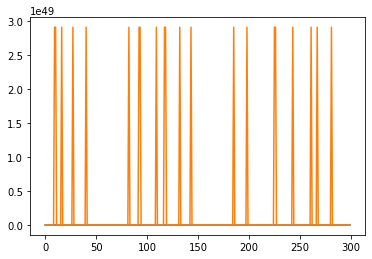

In [3]:
from ruster_neural import Ruster_Neural
r = Ruster_Neural(path="C:\\Users\\Revive\\PycharmProjects\\Rust_Native_ML\\rust\\PerceptronLib\\target\\release\\PerceptronLib.dll")
t1 = time.time()

XF = [item for sublist in X for item in sublist]
YF = [item for sublist in Y for item in sublist]

print(len(XF))

layer_count = 4
input_count = 64
hidden_count = 256
output_count = 3

losses = []
test_losses = []

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

value = r.predict_nn(nn, X[0], True, 3)
value = [value[0], value[1], value[2]]
print(value)
print()

for _ in range(300):
    r.train_nn(nn, XF, YF, 50, 0.0003, True)
    
    rand_idx = random.randint(0, len(X)-1)
    y_predict = r.predict_nn(nn, X[rand_idx], True, 3)
    y_predict = [y_predict[0], y_predict[1], y_predict[2]]
    loss = r.mse(y_predict, Y[rand_idx])
    losses.append(loss)
    
    dummy_y = r.predict_nn(nn, X[0], True, 3)
    dummy_predict = [dummy_y[0], dummy_y[1], dummy_y[2]]
    test_loss = r.mse(dummy_y, Y[0])
    test_losses.append(test_loss)
    
    if _%10 == 0:

#         value = r.predict_nn(nn, X[0], False, 3)
#         value = [value[0], value[1], value[2]]
#         loss = r.mse(value, Y[0])
#         losses.append(loss)
#         print(value)
#         print(Y[0])
#         print()
        
#         print(f"[{_}] [loss : {round(loss, 8)}] [idx: {rand_idx}] [predict: {y_predict}] [Y: {Y[rand_idx]}]")
        print()

print()
t2 = time.time()
print(t2 - t1)
plt.plot(losses)
plt.plot(test_losses)
plt.show()

r.store_nn(nn, 80303)
r.release_nn(nn)